In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import  accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
from helpers import create_category_map
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
#from sklearn.metrics import multilabel_confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
#import scipy as sp
from sklearn.model_selection import GridSearchCV


/home/patrick/Desktop/Projects/text-complexity-classification/venv/lib/python3.10/site-packages/torch/cuda/__init__.py:611: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


## Extrai dos dados as características que serão utilizadas
Lê os aquivos no diretório dataset, criando um dataframe com os dados categorizados.
Depois, analisa os textos do dataframe anterior e cria um novo dataframe com os resultados anexados.
Por fim, cria um arquivo csv com os resultados para agilizar o processo, não sendo necessário rodar o código novamente.

In [2]:
#analyze_and_create_output_csv('dataset', 'output.csv')

## Lê o arquivo csv com os dados já analisados e mapeia as categorias para números

In [3]:
#category_map = create_category_map('dataset_caed')
category_map = {'2_Ensino_Fundamental_II': 1,
 '3_Ensino_Medio': 2,
 '1_Ensino_Fundamental_I': 0,
 '4_Ensino_Superior': 3}

In [4]:
df = pd.read_csv('output3.csv')
df['category'] = df['category'].map(category_map)
df.dropna(inplace=True, axis=1)
df.astype({'category': 'category'}).dtypes
#df.dtypes


text                          object
passed_quality_check            bool
n_stop_words                 float64
alpha_ratio                  float64
mean_word_length             float64
                              ...   
proportion_unique_tokens     float64
n_characters                   int64
n_sentences                    int64
category                    category
name                          object
Length: 68, dtype: object

In [5]:
df

,text,passed_quality_check,n_stop_words,alpha_ratio,mean_word_length,doc_length,symbol_to_word_ratio_#,proportion_ellipsis,proportion_bullet_points,contains_lorem ipsum,...,syllables_per_token_mean,syllables_per_token_median,syllables_per_token_std,n_tokens,n_unique_tokens,proportion_unique_tokens,n_characters,n_sentences,category,name
0,"Como funciona, Origem das coisas. “É tarde! É ...",True,227.0,0.823183,4.088409,509.0,0.0,0.000000,0.0,0.0,...,1.963048,2.0,1.162748,433,247,0.570439,2081,33,1,53_2746.txt
1,A última rodada do primeiro turno do Campeonat...,True,207.0,0.843424,4.127349,479.0,0.0,0.000000,0.0,0.0,...,1.923077,2.0,1.025561,416,240,0.576923,1977,31,1,65_2775.txt
2,Em relação ao adolescente (maior de doze anos)...,False,205.0,0.869668,4.279621,422.0,0.0,0.000000,0.0,0.0,...,1.951482,2.0,1.148216,371,158,0.425876,1806,11,1,204_5035.txt
3,Curiosidades. Muitas pessoas dizem que o riso ...,True,196.0,0.868360,4.826790,433.0,0.0,0.000000,0.0,0.0,...,2.248677,2.0,1.339889,378,224,0.592593,2090,19,1,111_2840.txt
4,"O trabalho infantil, principalmente em carvoa...",True,146.0,0.867978,4.497191,356.0,0.0,0.000000,0.0,0.0,...,2.044444,2.0,1.233626,315,171,0.542857,1600,21,1,306_5137.txt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2071,Mecânica dos fluidos/Tensão superficial\nA pr...,False,186.0,0.827982,4.589450,436.0,0.0,0.333333,0.0,0.0,...,2.131148,2.0,1.348653,366,218,0.595628,2000,18,3,377_1409.txt
2072,Otimização/Método de gradientes conjugados\nE...,True,173.0,0.840399,4.738155,401.0,0.0,0.000000,0.0,0.0,...,2.213873,2.0,1.299370,346,190,0.549133,1899,24,3,451_1483.txt
2073,Mecânica dos fluidos/Exercícios resolvidos/A2\...,True,284.0,0.796000,4.245333,750.0,0.0,0.000000,0.0,0.0,...,2.033033,1.0,1.295217,666,280,0.420420,3184,28,3,292_1321.txt
2074,Logística/Movimentação de materiais/Equipament...,False,265.0,0.844311,4.968563,668.0,0.0,0.000000,0.0,0.0,...,2.312821,2.0,1.409221,585,262,0.447863,3319,25,3,263_1292.txt


In [6]:

#X_train, X_test, y_train, y_test = train_test_split(df['text'], df['category'], test_size=0.2, random_state=0)

#count_vect = CountVectorizer()
#X_train_counts = count_vect.fit_transform(X_train)
#df_bow = pd.DataFrame.sparse.from_spmatrix(X_train_counts)
#result = pd.concat([df, df_bow], axis=1)

#result = pd.concat([df, df_bow])
#result

In [7]:
#X_train.values

In [8]:
distribution = df.groupby('category').size()
total = distribution.sum()
weights = [distribution[i]/total for i in range(len(distribution))]
weights
#print class weight


[0.1430635838150289, 0.1565510597302505, 0.302504816955684, 0.3978805394990366]

In [9]:

def remove_outliers(dataframe):
        for col in dataframe.columns:
                #print(col)
                if dataframe[col].dtype == 'float64' or dataframe[col].dtype == 'int64':
                        Q1 = dataframe[col].quantile(0.25)
                        Q3 = dataframe[col].quantile(0.75)
                        IQR = Q3 - Q1
                        lower = Q1 - 1.5*IQR
                        upper = Q3 + 1.5*IQR
                        
                        dataframe = dataframe[(dataframe[col] >= lower) & (dataframe[col] <= upper)]
        return dataframe
                


In [10]:
#df = remove_outliers(df)


In [11]:
#df.boxplot(column=['flesch_reading_ease'], by=['category'])
#df.boxplot(column=['flesch_kincaid_grade'], by=['category'])

In [12]:
#correlation_matrix = df.corr()
#sns.heatmap(correlation_matrix, annot=False, cmap=plt.cm.Reds)

In [23]:

def perform_grid_search_cv(dataframe, seed):
        param_grid = [
       # {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
        {'bootstrap': [False, True], 'n_estimators': [10, 50, 100, 200], 'max_features': [10, 100, 1000 ]}]
        
        clf = RandomForestClassifier(random_state=seed)
        grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', return_train_score=True, verbose=3)
        
        X_train, X_test, y_train, y_test = train_test_split(dataframe['text'], dataframe['category'], test_size=0.2, random_state=seed)

        count_vect = CountVectorizer()
        X_train_counts = count_vect.fit_transform(X_train)
        
        tfidf_transformer = TfidfTransformer()
        X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

        grid_search.fit(X_train_tfidf, y_train)
        
        #X_test_counts = count_vect.transform(X_test)
        #X_test_tfidf = tfidf_transformer.transform(X_test_counts)
        return grid_search

In [24]:
gs = perform_grid_search_cv(df, 0)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END bootstrap=False, max_features=10, n_estimators=10;, score=(train=0.998, test=0.744) total time=   0.3s
[CV 2/5] END bootstrap=False, max_features=10, n_estimators=10;, score=(train=0.996, test=0.741) total time=   0.4s
[CV 3/5] END bootstrap=False, max_features=10, n_estimators=10;, score=(train=0.998, test=0.717) total time=   0.3s
[CV 4/5] END bootstrap=False, max_features=10, n_estimators=10;, score=(train=0.997, test=0.717) total time=   0.3s
[CV 5/5] END bootstrap=False, max_features=10, n_estimators=10;, score=(train=0.997, test=0.735) total time=   0.3s
[CV 1/5] END bootstrap=False, max_features=10, n_estimators=50;, score=(train=0.998, test=0.801) total time=   1.3s
[CV 2/5] END bootstrap=False, max_features=10, n_estimators=50;, score=(train=0.996, test=0.786) total time=   1.9s
[CV 3/5] END bootstrap=False, max_features=10, n_estimators=50;, score=(train=0.998, test=0.780) total time=   1.3s
[CV 4/5] E

In [25]:
gs.best_params_

{'bootstrap': False, 'max_features': 1000, 'n_estimators': 200}

In [26]:
gs.best_estimator_

RandomForestClassifier(bootstrap=False, max_features=1000, n_estimators=200,
                       random_state=0)

In [27]:
gs.best_score_

0.8686746987951807

In [29]:
#list(zip(cvres["mean_test_score"], cvres["params"]))

[(0.7307228915662651,
  {'bootstrap': False, 'max_features': 10, 'n_estimators': 10}),
 (0.7921686746987951,
  {'bootstrap': False, 'max_features': 10, 'n_estimators': 50}),
 (0.7927710843373494,
  {'bootstrap': False, 'max_features': 10, 'n_estimators': 100}),
 (0.808433734939759,
  {'bootstrap': False, 'max_features': 10, 'n_estimators': 200}),
 (0.780722891566265,
  {'bootstrap': False, 'max_features': 100, 'n_estimators': 10}),
 (0.8295180722891565,
  {'bootstrap': False, 'max_features': 100, 'n_estimators': 50}),
 (0.8451807228915664,
  {'bootstrap': False, 'max_features': 100, 'n_estimators': 100}),
 (0.8397590361445783,
  {'bootstrap': False, 'max_features': 100, 'n_estimators': 200}),
 (0.8048192771084338,
  {'bootstrap': False, 'max_features': 1000, 'n_estimators': 10}),
 (0.8536144578313254,
  {'bootstrap': False, 'max_features': 1000, 'n_estimators': 50}),
 (0.8602409638554217,
  {'bootstrap': False, 'max_features': 1000, 'n_estimators': 100}),
 (0.8686746987951807,
  {'boot

In [47]:


def run_experiment_round_bow(seed, dataframe, cols_X, cols_Y):
        X_train, X_test, y_train, y_test = train_test_split(dataframe['text'], dataframe['category'], test_size=0.2, random_state=seed)

        count_vect = CountVectorizer()
        X_train_counts = count_vect.fit_transform(X_train)
        
        tfidf_transformer = TfidfTransformer()
        X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
        
        clf = RandomForestClassifier(bootstrap=False, max_features=1000, n_estimators=200, random_state=seed, n_jobs=8)
        clf.fit(X_train_tfidf, y_train)
        
        X_test_counts = count_vect.transform(X_test)
        X_test_tfidf = tfidf_transformer.transform(X_test_counts)
        
        y_pred = clf.predict(X_test_tfidf)

        return accuracy_score(y_test, y_pred), confusion_matrix(y_test, y_pred), precision_score(y_test, y_pred, average='macro'), recall_score(y_test, y_pred, average='macro'), f1_score(y_test, y_pred, average='macro'), clf.feature_importances_



def run_experiment_round_bow_and_others(seed, dataframe, cols_X, cols_Y):
        X = dataframe[cols_X]
        y = dataframe[cols_Y]
        
        cols_to_normalize = X.columns.values.tolist()
        #cols_to_normalize.remove(cols_Y)
        cols_to_normalize = [col for col in cols_to_normalize if X[col].dtype == 'float64' or X[col].dtype == 'int64']
        
        # divide os dados em treino e teste para um experimento
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
        
        # Normaliza o conjunto de treino, criando uma escala baseada nele
        min_max_scaler = preprocessing.MinMaxScaler()
        scaled_X_train = min_max_scaler.fit_transform(X_train[cols_to_normalize])
        X_train[cols_to_normalize] = scaled_X_train
        
        #cria o bag of words para a coluna text para o conjunto de treino
        count_vect = CountVectorizer()
        X_train_counts = count_vect.fit_transform(X_train['text'])
        X_train.drop(columns=['text'], inplace=True)
        X_train.astype(pd.SparseDtype("float", fill_value=0.0))
        X_train
        
        tfidf_transformer = TfidfTransformer()
        X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
        X_train_bow = pd.DataFrame.sparse.from_spmatrix(X_train_tfidf)
        X_train = pd.concat([X_train, X_train_bow], axis=1)
        X_train.columns = X_train.columns.astype(str)
        
        
        # Normaliza o conjunto de teste, utilizando a escala criada no conjunto de treino
        scaled_X_test = min_max_scaler.transform(X_test[cols_to_normalize])
        X_test[cols_to_normalize] = scaled_X_test
        
        
        #cria o bag of words para a coluna text para o conjunto de teste
        X_test_counts = count_vect.transform(X_test['text'])
        X_test.drop(columns=['text'], inplace=True)
        X_train.astype(pd.SparseDtype("float", fill_value=0.0))
        #X_train = X_train.astype(pd.SparseDtype("int64", 0))
        X_test_tfidf = tfidf_transformer.transform(X_test_counts)
        X_test_bow = pd.DataFrame.sparse.from_spmatrix(X_test_tfidf)
        X_test = pd.concat([X_test, X_test_bow], axis=1)
        X_test.columns = X_test.columns.astype(str)

       
        rfc = RandomForestClassifier(random_state=seed, class_weight={0:weights[0], 1:weights[1], 2:weights[2], 3:weights[3]})
        rfc.fit(X_train, y_train)
        y_pred = rfc.predict(X_test)

        return accuracy_score(y_test, y_pred), confusion_matrix(y_test, y_pred), precision_score(y_test, y_pred, average='macro'), recall_score(y_test, y_pred, average='macro'), f1_score(y_test, y_pred, average='macro'), rfc.feature_importances_


def run_experiment_round(seed, dataframe, cols_X, cols_Y):
        X = dataframe[cols_X]
        y = dataframe[cols_Y]
        
        cols_to_normalize = X.columns.values.tolist()
        #cols_to_normalize.remove(cols_Y)
        cols_to_normalize = [col for col in cols_to_normalize if X[col].dtype == 'float64' or X[col].dtype == 'int64']
        
        # divide os dados em treino e teste para um experimento
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
        
        
       
       # Normaliza o conjunto de treino, criando uma escala baseada nele
        min_max_scaler = preprocessing.MinMaxScaler()
        scaled_X_train = min_max_scaler.fit_transform(X_train[cols_to_normalize])
        X_train[cols_to_normalize] = scaled_X_train
        
        # Normaliza o conjunto de teste, utilizando a escala criada no conjunto de treino
        scaled_X_test = min_max_scaler.transform(X_test[cols_to_normalize])
        X_test[cols_to_normalize] = scaled_X_test
       
        rfc = RandomForestClassifier(random_state=seed, class_weight={0:weights[0], 1:weights[1], 2:weights[2], 3:weights[3]})
        rfc.fit(X_train, y_train)
        y_pred = rfc.predict(X_test)

        return accuracy_score(y_test, y_pred), confusion_matrix(y_test, y_pred), precision_score(y_test, y_pred, average='macro'), recall_score(y_test, y_pred, average='macro'), f1_score(y_test, y_pred, average='macro'), rfc.feature_importances_

def run_experiment(seeds, dataframe, cols_X, cols_Y):
        result = {'accuracy_scores': [], 'confusion_matrices': [], 'precision_scores': [], 'recall_scores': [], 'f1_scores': [], 'feature_importances': []}
        
        for seed in seeds:
                print(f'Round: {seed}')
                res_accuracy_score, res_confusion_matrix, res_precision_score, res_recall_score, res_f1_score, res_feature_importances = run_experiment_round_bow(seed, dataframe, cols_X, cols_Y)
                result['accuracy_scores'].append(res_accuracy_score)
                result['confusion_matrices'].append(res_confusion_matrix)
                result['precision_scores'].append(res_precision_score)
                result['recall_scores'].append(res_recall_score)
                result['f1_scores'].append(res_f1_score)
                result['feature_importances'].append(res_feature_importances)
        
        return result

In [48]:
# remove colunas que não serão utilizadas e seleciona as colunas de entrada e saída
cols_x = df.columns.values.tolist()
cols_x.remove('category')
cols_x.remove('name')
#cols_x.remove('text')
cols_y = ['category']
results = pd.DataFrame(run_experiment(range(30), df, cols_x, 'category'))

Round: 0
Round: 1
Round: 2
Round: 3
Round: 4
Round: 5
Round: 6
Round: 7
Round: 8
Round: 9
Round: 10
Round: 11
Round: 12
Round: 13
Round: 14
Round: 15
Round: 16
Round: 17
Round: 18
Round: 19
Round: 20
Round: 21
Round: 22
Round: 23
Round: 24
Round: 25
Round: 26
Round: 27
Round: 28
Round: 29


In [49]:
results.describe()

,accuracy_scores,precision_scores,recall_scores,f1_scores
count,30.000000,30.000000,30.000000,30.000000
mean,0.868750,0.862956,0.841742,0.845667
std,0.015368,0.016984,0.017890,0.018922
min,0.831731,0.818782,0.796601,0.802844
25%,0.859976,0.856888,0.830164,0.834394
50%,0.873798,0.868237,0.846758,0.852913
75%,0.879808,0.874941,0.853591,0.857642
max,0.891827,0.887209,0.867931,0.872834


In [50]:
results.iloc[results['accuracy_scores'].idxmax()]

accuracy_scores                                                 0.891827
confusion_matrices     [[58, 2, 0, 1], [9, 43, 8, 3], [1, 3, 113, 13]...
precision_scores                                                0.886975
recall_scores                                                   0.867931
f1_scores                                                       0.872834
feature_importances    [2.103503954857788e-05, 7.088386617630813e-05,...
Name: 14, dtype: object

In [51]:
results2 = pd.DataFrame(run_experiment([14], df, cols_x, 'category'))

Round: 14


KeyboardInterrupt: 

In [52]:
results2

,accuracy_scores,confusion_matrices,precision_scores,recall_scores,f1_scores,feature_importances
0,0.891827,"[[58, 2, 0, 1], [9, 43, 8, 3], [1, 3, 113, 13]...",0.886975,0.867931,0.872834,"[2.103503954857788e-05, 7.088386617630813e-05,..."


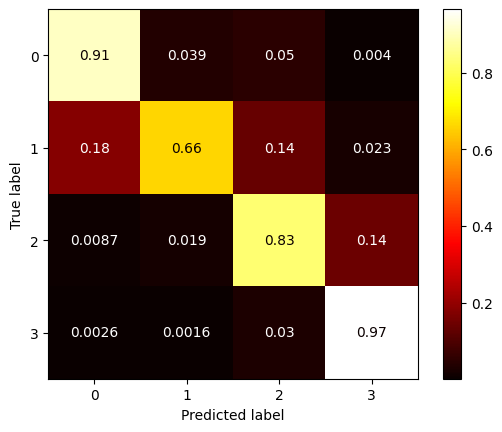

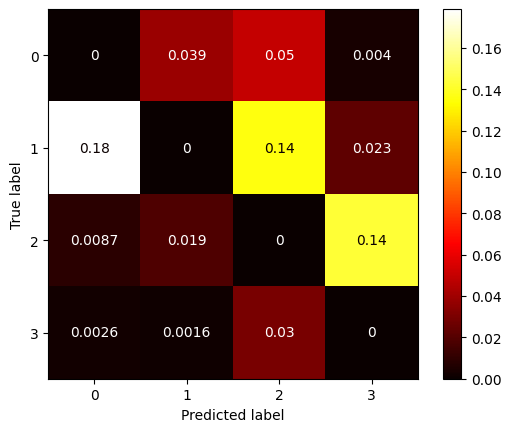

In [53]:

aggregated_confusion_matrix = results['confusion_matrices'].sum()
normalized_confusion_matrix = aggregated_confusion_matrix.astype('float') / aggregated_confusion_matrix.sum(axis=1)[:, np.newaxis]
disp = ConfusionMatrixDisplay(confusion_matrix=normalized_confusion_matrix, display_labels=[0,1,2,3])

disp = disp.plot(include_values=True, cmap='hot', ax=None, xticks_rotation='horizontal', values_format=None)

confusion_matrix_zero_diagonal = normalized_confusion_matrix.copy()
np.fill_diagonal(confusion_matrix_zero_diagonal, 0)
disp2 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_zero_diagonal, display_labels=[0,1,2,3])
disp2 = disp2.plot(include_values=True, cmap='hot', ax=None, xticks_rotation='horizontal', values_format=None)